# Download Charts

<a href="https://colab.research.google.com/github/run-llama/llama_cloud_services/blob/main/examples/demo_get_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates how to download charts from a document using the result object.

The result object for each file provides a wealth of data and metadata for each page of your document, including details about charts and images.

Status:
| Last Executed | Version | State      |
|---------------|---------|------------|
| Aug-18-2025   | 0.6.61  | Maintained |

### Setup

Let's bring in our imports and set up our API keys.

In [ ]:
%pip install "llama-index>=0.13.2<0.14.0" llama-cloud-services matplotlib

In [ ]:
import os

# API access to llama-cloud
os.environ["LLAMA_CLOUD_API_KEY"] = "llx-..."

### Download Data

Let's use [`AGENTLESS :
Demystifying LLM-based Software Engineering Agents`](https://arxiv.org/pdf/2407.01489) paper and download the charts present in the paper.

In [ ]:
!wget 'https://arxiv.org/pdf/2407.01489' -O "agentless.pdf"

--2025-08-18 22:51:22--  https://arxiv.org/pdf/2407.01489
Resolving arxiv.org (arxiv.org)... 151.101.195.42, 151.101.67.42, 151.101.131.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.195.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1384716 (1.3M) [application/pdf]
Saving to: ‘agentless.pdf’

agentless.pdf       100%[===================>]   1.32M  7.11MB/s    in 0.2s    

2025-08-18 22:51:23 (7.11 MB/s) - ‘agentless.pdf’ saved [1384716/1384716]



### Using LlamaParse in JSON Mode for PDF Reading to get charts.

Let's parse our document! 

We need to enable `extract_charts` parameter to get the charts present in the document.

In [ ]:
from llama_cloud_services import LlamaParse

parser = LlamaParse(
    parse_mode="parse_page_with_agent",
    model="openai-gpt-4-1-mini",
    high_res_ocr=True,
    adaptive_long_table=True,
    outlined_table_extraction=True,
    output_tables_as_HTML=True,
    # needed to pull out charts from the content
    extract_charts=True,
)

result = await parser.aparse("agentless.pdf")

Started parsing the file under job_id 1524dfe1-6225-471f-9672-64ccc04e31dd
....

### Download Charts

Using the result object, we can access each page and its charts (if any) and save them to a directory.

In [ ]:
print(result.pages[4].charts)

[ChartItem(name='chart_p5_0.png', x=108.0, y=38.96, width=434.93, height=262.99)]


In [ ]:
output_dir = "./saved_charts"
for page in result.pages:
    for chart in page.charts:
        print(f"Saving chart {chart.name} to {output_dir}")
        await result.asave_image(chart.name, output_dir)

Saving chart chart_p5_0.png to ./saved_charts
Saving chart chart_p7_0.png to ./saved_charts
Saving chart chart_p10_0.png to ./saved_charts
Saving chart chart_p11_0.png to ./saved_charts
Saving chart chart_p12_0.png to ./saved_charts
Saving chart chart_p13_0.png to ./saved_charts
Saving chart chart_p14_0.png to ./saved_charts
Saving chart chart_p14_1.png to ./saved_charts
Saving chart chart_p14_2.png to ./saved_charts
Saving chart chart_p15_0.png to ./saved_charts
Saving chart chart_p17_0.png to ./saved_charts
Saving chart chart_p18_0.png to ./saved_charts


### Let's plot a randomly selected chart

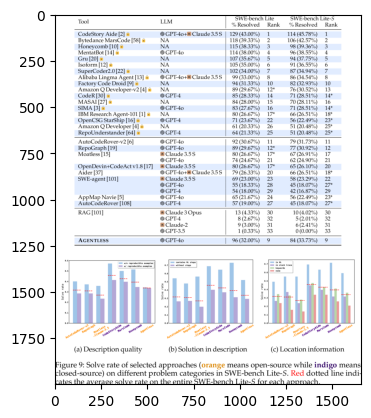

In [ ]:
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

# Use glob to list all PNG files in the folder
image_files = glob.glob("saved_charts/*.png")

# Randomly select an image file
random_image = random.choice(image_files)

# Open and plot the image
img = Image.open(random_image)
plt.imshow(img)
plt.show()